In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0) BASE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ASAC_4기_기업프로젝트_SK하이닉스/1. 데이터 전처리/5. 최종 데이터셋(2024.00.00 기준)/(수정)final_df_reordered.csv', header=0)

In [ ]:
columns_to_drop = ['TA_tm_before', 'start_dt_tm', 'end_dt_tm', 'TA_tm_after', 'P_Time', 'sequence']
df.drop(columns_to_drop, axis=1, inplace=True)
df.head()

,step_hours,last_hours,rep_hours,Cumulative_Count_TA,Cumulative_Count_P,2,8,9,11,17,...,stddev_val_17_Diff,stddev_val_18_Diff,stddev_val_19_Diff,max_val_pca_Diff,min_val_pca_Diff,stddev_val_pca_Diff,mean_val_pca_Diff,range_val_pca_Diff,median_val_pca_Diff,diff_hours
0,0.240833,53.261944,35.618611,3,3,False,False,False,False,False,...,-0.011524,0.219372,0.332226,-48.464392,-48.464392,-48.464392,-48.464392,-48.464392,-48.464392,169.024444
1,0.010000,53.478333,35.835000,4,4,False,False,False,False,False,...,-0.005883,-0.359641,-0.515629,-40.148962,-40.148962,-40.148962,-40.148962,-40.148962,-40.148962,168.808056
2,128.656944,53.502778,35.859444,1,1,False,False,False,False,False,...,-0.014540,-0.178041,-0.189356,-73.647082,-73.647082,-73.647082,-73.647082,-73.647082,-73.647082,168.783611
3,0.113889,53.506111,35.862778,2,2,False,False,False,False,False,...,0.036082,-0.248223,-0.109616,-73.647082,-73.647082,-73.647082,-73.647082,-73.647082,-73.647082,168.780278
4,0.231667,53.620278,35.976944,3,3,False,False,False,False,False,...,-0.072168,0.233206,0.646370,-33.192453,-33.192453,-33.192453,-33.192453,-33.192453,-33.192453,168.666111


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/ASAC_4기_기업프로젝트_SK하이닉스/1. 데이터 전처리/5. 최종 데이터셋(2024.00.00 기준)/final_train_set.csv')
columns_to_drop = ['TA_tm_before', 'start_dt_tm', 'end_dt_tm', 'TA_tm_after', 'P_Time', 'sequence']
df_train.drop(columns_to_drop, axis=1, inplace=True)
df_train.head()

,Unnamed: 0,RCP_ID,STEP_NM,step_hours,last_hours,rep_hours,Cumulative_Count_TA,Cumulative_Count_P,STEP_2,STEP_8,...,stddev_val_17_Diff,stddev_val_18_Diff,stddev_val_19_Diff,max_val_pca_Diff,min_val_pca_Diff,stddev_val_pca_Diff,mean_val_pca_Diff,range_val_pca_Diff,median_val_pca_Diff,diff_hours
0,0,13,36,0.240833,53.261944,35.618611,3,3,0.0,0.0,...,-0.011524,0.219372,0.332226,-48.464392,-48.464392,-48.464392,-48.464392,-48.464392,-48.464392,169.024444
1,1,13,36,0.010000,53.478333,35.835000,4,4,0.0,0.0,...,-0.005883,-0.359641,-0.515629,-40.148962,-40.148962,-40.148962,-40.148962,-40.148962,-40.148962,168.808056
2,2,1,36,128.656944,53.502778,35.859444,1,1,0.0,0.0,...,-0.014540,-0.178041,-0.189356,-73.647082,-73.647082,-73.647082,-73.647082,-73.647082,-73.647082,168.783611
3,3,1,36,0.113889,53.506111,35.862778,2,2,0.0,0.0,...,0.036082,-0.248223,-0.109616,-73.647082,-73.647082,-73.647082,-73.647082,-73.647082,-73.647082,168.780278
4,4,1,36,0.231667,53.620278,35.976944,3,3,0.0,0.0,...,-0.072168,0.233206,0.646370,-33.192453,-33.192453,-33.192453,-33.192453,-33.192453,-33.192453,168.666111


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/ASAC_4기_기업프로젝트_SK하이닉스/1. 데이터 전처리/5. 최종 데이터셋(2024.00.00 기준)/final_test_set.csv')
columns_to_drop = ['TA_tm_before', 'start_dt_tm', 'end_dt_tm', 'TA_tm_after', 'P_Time', 'sequence']
df_test.drop(columns_to_drop, axis=1, inplace=True)
df_test.head()

,Unnamed: 0,RCP_ID,STEP_NM,step_hours,last_hours,rep_hours,Cumulative_Count_TA,Cumulative_Count_P,STEP_2,STEP_8,...,stddev_val_17_Diff,stddev_val_18_Diff,stddev_val_19_Diff,max_val_pca_Diff,min_val_pca_Diff,stddev_val_pca_Diff,mean_val_pca_Diff,range_val_pca_Diff,median_val_pca_Diff,diff_hours
0,38516,5,21,0.635556,0.050833,545.673333,1,46,0.0,0.0,...,0.149318,8.132762,0.109083,-134.618800,-134.618800,-134.618800,-134.618800,-134.618800,-134.618800,142.781944
1,38517,24,36,0.013333,42.261389,30.383889,4,4,0.0,0.0,...,-0.036785,-0.281647,-0.387754,119.861907,119.861907,119.861907,119.861907,119.861907,119.861907,100.571389
2,38518,7,36,149.728056,42.278056,30.400556,2,2,0.0,0.0,...,0.123790,0.156031,0.101880,-162.291842,-162.291842,-162.291842,-162.291842,-162.291842,-162.291842,100.554722
3,38519,26,36,0.463611,42.811667,30.934167,3,3,0.0,0.0,...,-0.083787,0.637215,0.305604,6.006726,6.006726,6.006726,6.006726,6.006726,6.006726,100.021111
4,38520,26,11,0.327500,42.910000,31.032500,2,2,0.0,0.0,...,0.096533,0.267776,0.060305,0.058598,0.058598,0.058598,0.058598,0.058598,0.058598,99.922778


In [ ]:
X_train = df_train.drop('diff_hours', axis=1)
y_train = df_train['diff_hours']

X_test = df_test.drop('diff_hours', axis=1)
y_test = df_test['diff_hours']

In [ ]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

In [ ]:
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 설정 통일
n_units = 50
input_shape = (X_train_scaled.shape[1], 1)  # Conv1D, LSTM
input_shape_2d = (1, X_train_scaled.shape[1], 1)  # Conv2D
input_shape_3d = (1, 1, X_train_scaled.shape[1], 1)  # Conv3D
epochs = 50

# 1) CNN

## 1-1) CNN 1D

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.metrics import MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler

In [ ]:
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 설정 통일
n_units = 50
input_shape = (X_train_scaled.shape[1], 1)  # Conv1D, LSTM
input_shape_2d = (1, X_train_scaled.shape[1], 1)  # Conv2D
input_shape_3d = (1, 1, X_train_scaled.shape[1], 1)  # Conv3D
epochs = 50

In [ ]:
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
model_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
history_cnn = model_cnn.fit(X_train_scaled, y_train, epochs=epochs, verbose=1, validation_data=(X_test_scaled, y_test))

predictions_cnn = model_cnn.predict(X_test_scaled)
mse_cnn, rmse_cnn, mae_cnn = calculate_metrics(y_test, predictions_cnn.flatten())

Epoch 1/50
1204/1204 [==============================] - 5s 3ms/step - loss: 1357.7599 - mse: 1357.7599 - mae: 28.5568 - val_loss: 1796.0493 - val_mse: 1796.0493 - val_mae: 35.7903
Epoch 2/50
1204/1204 [==============================] - 4s 3ms/step - loss: 735.3073 - mse: 735.3073 - mae: 19.3781 - val_loss: 1309.2781 - val_mse: 1309.2781 - val_mae: 27.6850
Epoch 3/50
1204/1204 [==============================] - 4s 3ms/step - loss: 548.6283 - mse: 548.6283 - mae: 16.2722 - val_loss: 1786.0493 - val_mse: 1786.0493 - val_mae: 33.8918
Epoch 4/50
1204/1204 [==============================] - 4s 3ms/step - loss: 437.6431 - mse: 437.6431 - mae: 14.2754 - val_loss: 1811.8375 - val_mse: 1811.8375 - val_mae: 34.2217
Epoch 5/50
1204/1204 [==============================] - 4s 3ms/step - loss: 350.4989 - mse: 350.4989 - mae: 12.6607 - val_loss: 1758.1260 - val_mse: 1758.1260 - val_mae: 32.7297
Epoch 6/50
1204/1204 [==============================] - 4s 3ms/step - loss: 314.1302 - mse: 314.1302 - mae: 

In [ ]:
# 메트릭 결과 출력
print(f'Test MSE: {mse_cnn}, Test MAE: {mae_cnn}, Test RMSE: {rmse_cnn}')

Test MSE: 1906.654064540911, Test MAE: 34.49934625285365, Test RMSE: 43.66525007990806


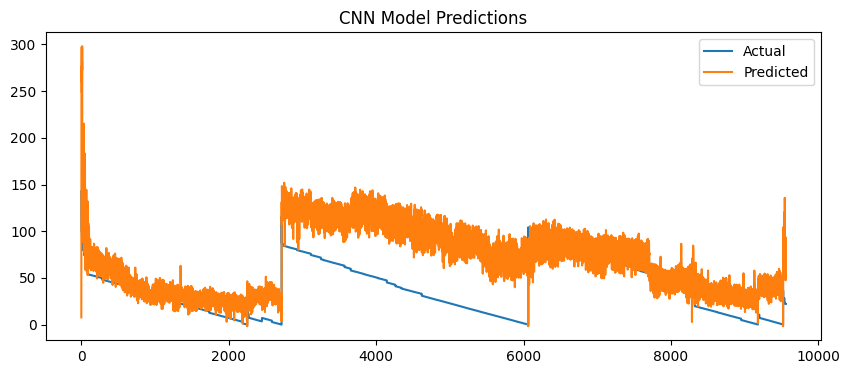

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Actual')
plt.plot(predictions_cnn, label='Predicted')
plt.title('CNN Model Predictions')
plt.legend()
plt.show()

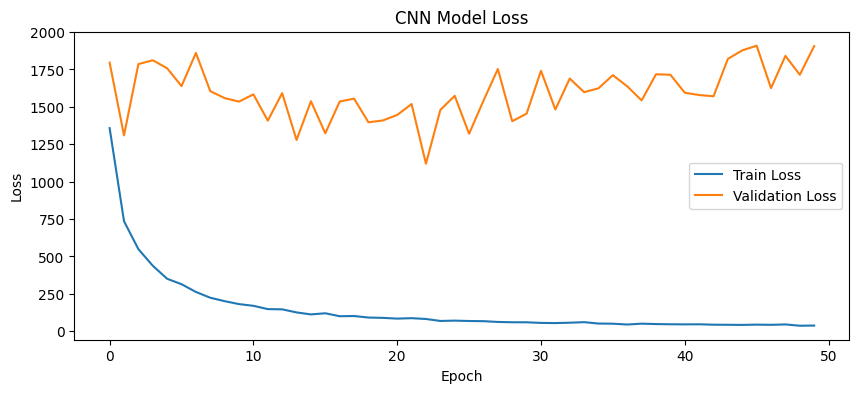

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 1-2) CNN 2D

In [ ]:
from keras.layers import Conv2D, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 설정 통일
n_units = 50
input_shape = (X_train_scaled.shape[1], 1)  # Conv1D, LSTM
input_shape_2d = (1, X_train_scaled.shape[1], 1)  # Conv2D
input_shape_3d = (1, 1, X_train_scaled.shape[1], 1)  # Conv3D
epochs = 50

In [ ]:
X_train_scaled_2d = X_train_scaled.reshape(-1, 1, X_train_scaled.shape[1], 1)
X_test_scaled_2d = X_test_scaled.reshape(-1, 1, X_test_scaled.shape[1], 1)
model_cnn2d = Sequential([
    Conv2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=input_shape_2d),
    MaxPooling2D(pool_size=(1,2)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
model_cnn2d.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
history_cnn2d = model_cnn2d.fit(X_train_scaled_2d, y_train, epochs=epochs, verbose=1, validation_data=(X_test_scaled_2d, y_test))

Epoch 1/50
1204/1204 [==============================] - 5s 3ms/step - loss: 1392.1536 - mse: 1392.1536 - mae: 29.1366 - val_loss: 1617.1639 - val_mse: 1617.1639 - val_mae: 32.4812
Epoch 2/50
1204/1204 [==============================] - 4s 3ms/step - loss: 751.1476 - mse: 751.1476 - mae: 19.5712 - val_loss: 1570.9227 - val_mse: 1570.9227 - val_mae: 32.3363
Epoch 3/50
1204/1204 [==============================] - 4s 3ms/step - loss: 555.9153 - mse: 555.9153 - mae: 16.4689 - val_loss: 1823.7913 - val_mse: 1823.7913 - val_mae: 34.2576
Epoch 4/50
1204/1204 [==============================] - 4s 3ms/step - loss: 446.0938 - mse: 446.0938 - mae: 14.5195 - val_loss: 1388.1553 - val_mse: 1388.1553 - val_mae: 29.1317
Epoch 5/50
1204/1204 [==============================] - 4s 3ms/step - loss: 357.0262 - mse: 357.0262 - mae: 12.9186 - val_loss: 1738.2677 - val_mse: 1738.2677 - val_mae: 32.4295
Epoch 6/50
1204/1204 [==============================] - 4s 3ms/step - loss: 303.6668 - mse: 303.6668 - mae: 

In [ ]:
predictions_cnn2d = model_cnn2d.predict(X_test_scaled)
mse_cnn2d, rmse_cnn2d, mae_cnn2d = calculate_metrics(y_test, predictions_cnn2d.flatten())

In [ ]:
###########################################################################

제공된 배열의 크기와 새로 지정하려는 모양의 일치가 필요함. 원래 1차원 데이터를 4차원(2D 컨볼루션에 필요한 형태)으로 재구성하려고 하지만, 지정된 모양이 원래 데이터의 총 요소 수와 맞지 않아서 발생하면 위에 오류가 발생한다고...?

그래서 먼저 데이터의 현재 차원과 요소 수를 확인하고 데이터를 올바르게 재구성할 수 있는 차원을 계산해야함. 만약에 원본 데이터가 (38515, 264) 형태라면, 각 샘플을 (1, 10, 10, 1)로 재구성하려면 원본 데이터의 특성 수가 100개여야 한다고...?

그럼,,,,컨볼루션에 적합한 형태인 (Height, Width, Channel)로 데이터를 재구성하기 위해 원하는 Height와 Width가 원본 데이터의 특성 수를 나눌 수 있어야 함..
Height * Width가 264 또는 그것의 약수여야 하고, 예를 들자면 264를 11 x 24로 재구성할 수 있음. 이 경우 채널이 1이므로 최종 형태는 (38515, 11, 24, 1)이 됨

In [ ]:
print("원본 데이터 형태:", X_train_scaled.shape)
print("원본 데이터 형태:", X_test_scaled.shape)

원본 데이터 형태: (38515, 264)
원본 데이터 형태: (9561, 264)


In [ ]:
# 데이터 차원 확인
print("X_train_scaled_2d shape:", X_train_scaled_2d.shape)
print("X_test_scaled_2d shape:", X_test_scaled_2d.shape)

# 왜 에러 발생? 에러확인
try:
    predictions_cnn2d = model_cnn2d.predict(X_test_scaled_2d)
    print("예측성공")
except Exception as e:
    print("예측에러:", e)

try:
    mse, mae = model_cnn2d.evaluate(X_test_scaled_2d, y_test, verbose=0)
    print("평가성공")
    print("MSE:", mse, "MAE:", mae)
except Exception as e:
    print("평가에러:", e)

X_train_scaled_2d shape: (38515, 11, 24, 1)
X_test_scaled_2d shape: (9561, 11, 24, 1)
299/299 [==============================] - 0s 1ms/step
예측성공
평가에러: too many values to unpack (expected 2)


In [ ]:
# mean_squared_error와 mean_absolute_error를 metrics로 설정했기 때문에, 반환되는 값은 세 개가 되어서 인듯?(손실, MSE, MAE).
try:
    loss, mse, mae = model_cnn2d.evaluate(X_test_scaled_2d, y_test, verbose=0)
    print("평가성공")
    print("Loss:", loss, "MSE:", mse, "MAE:", mae)
except Exception as e:
    print("평가에러:", e)

평가성공
Loss: 1743.545166015625 MSE: 1743.545166015625 MAE: 33.91383361816406


In [ ]:
# 적절한 차원으로 변환하기
Height = 11
Width = 24
Channel = 1
X_train_scaled_2d = X_train_scaled.reshape(-1, Height, Width, Channel)
X_test_scaled_2d = X_test_scaled.reshape(-1, Height, Width, Channel)

# 모델 구성
model_cnn2d = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(Height, Width, Channel)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

# 컴파일과 훈련
model_cnn2d.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
history_cnn2d = model_cnn2d.fit(X_train_scaled_2d, y_train, epochs=50, verbose=1, validation_data=(X_test_scaled_2d, y_test))

Epoch 1/50
1204/1204 [==============================] - 5s 3ms/step - loss: 1657.6804 - mse: 1657.6804 - mae: 32.8361 - val_loss: 1368.1467 - val_mse: 1368.1467 - val_mae: 31.0162
Epoch 2/50
1204/1204 [==============================] - 4s 3ms/step - loss: 875.2366 - mse: 875.2366 - mae: 21.6689 - val_loss: 1786.6089 - val_mse: 1786.6089 - val_mae: 35.6564
Epoch 3/50
1204/1204 [==============================] - 4s 3ms/step - loss: 644.4922 - mse: 644.4922 - mae: 17.8865 - val_loss: 1899.3270 - val_mse: 1899.3270 - val_mae: 35.9254
Epoch 4/50
1204/1204 [==============================] - 4s 3ms/step - loss: 566.6082 - mse: 566.6082 - mae: 16.5797 - val_loss: 1407.7356 - val_mse: 1407.7356 - val_mae: 30.3001
Epoch 5/50
1204/1204 [==============================] - 4s 3ms/step - loss: 490.8370 - mse: 490.8370 - mae: 15.4107 - val_loss: 1976.3031 - val_mse: 1976.3031 - val_mae: 36.0544
Epoch 6/50
1204/1204 [==============================] - 4s 3ms/step - loss: 453.1455 - mse: 453.1455 - mae: 

299/299 [==============================] - 0s 1ms/step
2D CNN Test MSE: 1743.545501776822, Test RMSE: 41.7557840517553, Test MAE: 33.91383100079615


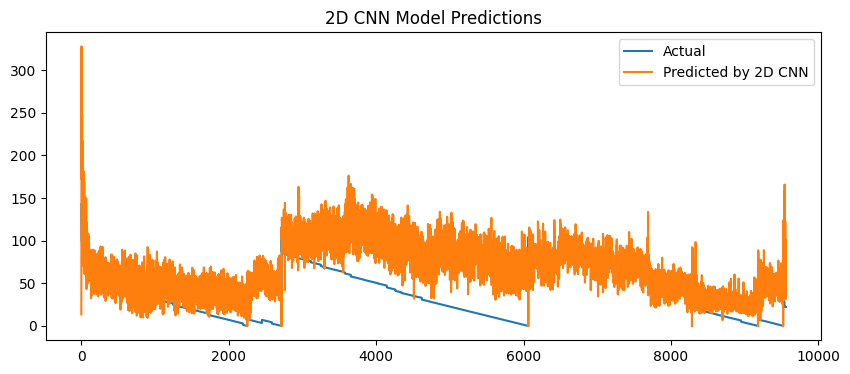

In [ ]:
#predictions_cnn2d = model_cnn2d.predict(X_test_scaled)
#mse_cnn2d, rmse_cnn2d, mae_cnn2d = calculate_metrics(y_test, predictions_cnn2d.flatten())

# 테스트 데이터에 대해 예측
predictions_cnn2d = model_cnn2d.predict(X_test_scaled_2d)

# 예측 결과를 1차원 배열로 변환
predictions_cnn2d_flat = predictions_cnn2d.flatten()

# 성능 지표 계산
mse_cnn2d, rmse_cnn2d, mae_cnn2d = calculate_metrics(y_test, predictions_cnn2d_flat)

print(f'2D CNN Test MSE: {mse_cnn2d}, Test RMSE: {rmse_cnn2d}, Test MAE: {mae_cnn2d}')

plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Actual')
plt.plot(predictions_cnn2d, label='Predicted by 2D CNN')
plt.title('2D CNN Model Predictions')
plt.legend()
plt.show()

## 1-3) CNN 3D

- 시계열 데이터에서 3D CNN을 사용하는 경우, 각 시퀀스를 하나의 "깊이" 차원으로 간주

- 시계열 데이터에 3D CNN을 적용하기 위해서 데이터를 (samples, spatial_dimension_1, spatial_dimension_2, temporal_dimension, channels) 형태로 재구성

- 각 샘플을 window로 나누고, window에서 여러 피처들을 공간적 차원으로 활용


In [ ]:
from keras.layers import Conv3D, MaxPooling3D

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 설정 통일
n_units = 50
input_shape = (X_train_scaled.shape[1], 1)  # Conv1D, LSTM
input_shape_2d = (1, X_train_scaled.shape[1], 1)  # Conv2D
input_shape_3d = (1, 1, X_train_scaled.shape[1], 1)  # Conv3D
epochs = 50

In [ ]:
# 데이터의 총 크기 계산
total_size = X_train_scaled.shape[0] * X_train_scaled.shape[1]
expected_size = num_samples * Window * Height * Width * Channel

print("Total size available:", total_size)
print("Total size needed for reshape:", expected_size)

# 현재 num_samples가 너무 많을 수 있으므로, 데이터 크기에 맞게 조정
if expected_size > total_size:
    num_samples = total_size // (Window * Height * Width * Channel)
    print("Adjusted num_samples:", num_samples)

# 데이터 재구성
X_train_scaled_3d = np.array([X_train_scaled[i:i+Window].reshape(Window, Height, Width, Channel) for i in range(num_samples)])
X_test_scaled_3d = np.array([X_test_scaled[i:i+Window].reshape(Window, Height, Width, Channel) for i in range(num_samples)])

Total size available: 10167960
Total size needed for reshape: 71164632
Adjusted num_samples: 5502


위 코드는 필요한 데이터의 총 크기가 현재 사용 가능한 데이터 크기보다 훨씬 크다는 의미로, 원하는 차원으로 데이터 재구성이 불가능함을 뜻함..사용 가능한 데이터량이 부족하거나? reshape 시 차원 설정이 잘못되었을 수도 있다는데 구글에서..

In [ ]:
# 데이터의 차원과 각 차원의 크기를 조정
Window = 7  # 시계열 데이터의 윈도우 크기
Height = 10  # 높이
Width = 24  # 너비
Channel = 1  # 채널 수

# num_samples 계산
num_samples = total_size // (Window * Height * Width * Channel)
print("Available samples:", num_samples)

# 데이터 재구성
X_train_scaled_3d = X_train_scaled[:num_samples * Window].reshape(num_samples, Window, Height, Width, Channel)
X_test_scaled_3d = X_test_scaled[:num_samples * Window].reshape(num_samples, Window, Height, Width, Channel)

print("New shape for X_train_scaled_3d:", X_train_scaled_3d.shape)
print("New shape for X_test_scaled_3d:", X_test_scaled_3d.shape)

In [ ]:
# 지정된 모든 차원의 곱이 원본 데이터의 총 요소 수와 일치해야 한다..!
# Window size 설정
Window = 7
Height = 10
Width = 24
Channel = 1

# 데이터 (samples, depth, height, width, channels) 형태로 재구성
# samples의 수를 유지하면서 depth 차원으로 window size를 적용
num_samples = total_size // (Window * Height * Width * Channel)
print("Available samples:", num_samples)

X_train_scaled_3d = np.array([X_train_scaled[i:i+Window].reshape(Window, Height, Width, Channel) for i in range(num_samples)])
X_test_scaled_3d = np.array([X_test_scaled[i:i+Window].reshape(Window, Height, Width, Channel) for i in range(num_samples)])

model_cnn3d = Sequential([
    Conv3D(filters=64, kernel_size=(3, 1, 3), activation='relu', input_shape=(Window, Height, Width, Channel)),
    MaxPooling3D(pool_size=(2, 1, 2)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model_cnn3d.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
history_cnn3d = model_cnn3d.fit(X_train_scaled_3d, y_train[:num_samples], epochs=50, verbose=1, validation_data=(X_test_scaled_3d, y_test[:num_samples]))


In [ ]:
# 차원 번경 이것도 약수로
Depth = 10
Height = 11
Width = 24
Channel = 1
X_train_scaled_3d = X_train_scaled.reshape(-1, Depth, Height, Width, Channel)
X_test_scaled_3d = X_test_scaled.reshape(-1, Depth, Height, Width, Channel)

# 3D CNN 모델 구성
model_cnn3d = Sequential([
    Conv3D(filters=64, kernel_size=(3,3,3), activation='relu', input_shape=(Depth, Height, Width, Channel)),
    MaxPooling3D(pool_size=(2,2,2)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model_cnn3d.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
history_cnn3d = model_cnn3d.fit(X_train_scaled_3d, y_train, epochs=50, verbose=1, validation_data=(X_test_scaled_3d, y_test))

In [ ]:
# 테스트 데이터에 대해 예측
predictions_cnn2d = model_cnn2d.predict(X_test_scaled_2d)

# 예측 결과를 1차원 배열로 변환
predictions_cnn2d_flat = predictions_cnn2d.flatten()

# 성능 지표 계산
mse_cnn2d, rmse_cnn2d, mae_cnn2d = calculate_metrics(y_test, predictions_cnn2d_flat)

print(f'2D CNN Test MSE: {mse_cnn2d}, Test RMSE: {rmse_cnn2d}, Test MAE: {mae_cnn2d}')

plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Actual')
plt.plot(predictions_cnn2d, label='Predicted by 2D CNN')
plt.title('2D CNN Model Predictions')
plt.legend()
plt.show()

# 2) DLSTM

LSTM에 깊이를 추가한 구조로, 시퀀스 데이터에 대한 학습 능력이 더 강화된 것임

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf

In [ ]:
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 설정 통일
n_units = 50
input_shape = (X_train_scaled.shape[1], 1)  # Conv1D, LSTM
input_shape_2d = (1, X_train_scaled.shape[1], 1)  # Conv2D
input_shape_3d = (1, 1, X_train_scaled.shape[1], 1)  # Conv3D
epochs = 50

In [ ]:
model_dlstm = Sequential([
    LSTM(n_units, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])),
    Dropout(0.2),
    LSTM(n_units, return_sequences=True),
    Dropout(0.2),
    LSTM(n_units),
    Dense(1)
])
model_dlstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
history_dlstm = model_dlstm.fit(X_train_scaled, y_train, epochs=epochs, verbose=1, validation_data=(X_test_scaled, y_test))

predictions_dlstm = model_dlstm.predict(X_test_scaled)

mse_dlstm, rmse_dlstm, mae_dlstm = calculate_metrics(y_test, predictions_dlstm.flatten())

In [ ]:
# 메트릭 결과 출력
print(f'Test MSE: {mse_dlstm}, Test MAE: {mae_dlstm}, Test RMSE: {rmse_dlstm}')

Test MSE: 2471.467027418451, Test MAE: 41.0089576632875, Test RMSE: 49.7138514643399


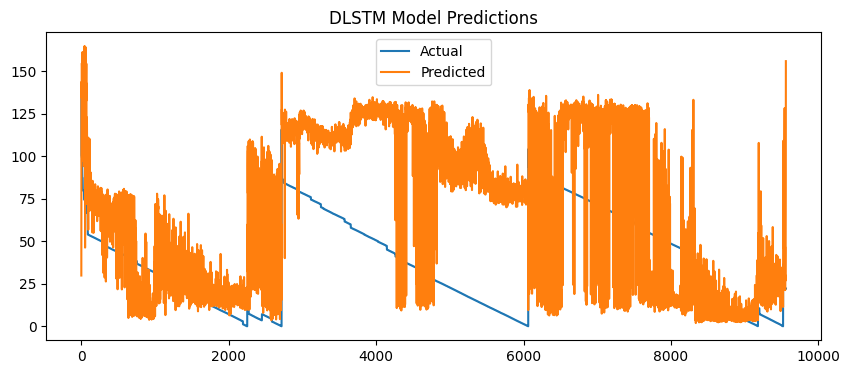

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Actual')
plt.plot(predictions_dlstm, label='Predicted')
plt.title('DLSTM Model Predictions')
plt.legend()
plt.show()

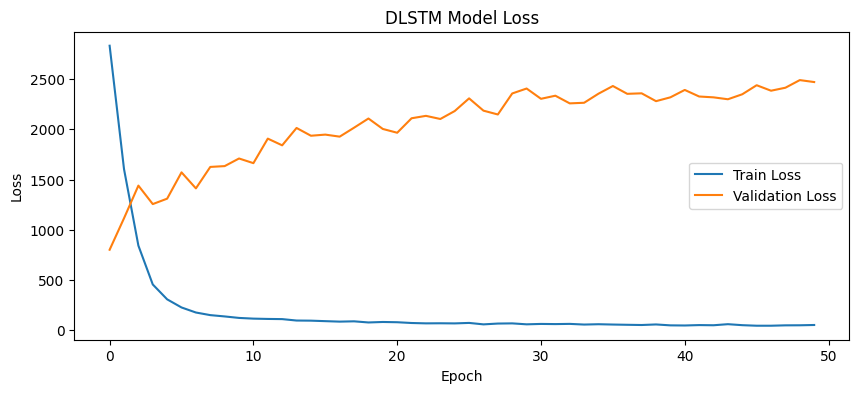

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(history_dlstm.history['loss'], label='Train Loss')
plt.plot(history_dlstm.history['val_loss'], label='Validation Loss')
plt.title('DLSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 3) DCNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 차원 추가: Conv1D는 (batch_size, steps, input_dim)의 3D 텐서를 요구하므로
X_train_scaled2 = np.expand_dims(X_train, axis=2)
X_test_scaled2 = np.expand_dims(X_test, axis=2)


model_dcnn = Sequential()
model_dcnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_scaled2.shape[1], 1)))
model_dcnn.add(MaxPooling1D(pool_size=2))
model_dcnn.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model_dcnn.add(MaxPooling1D(pool_size=2))
model_dcnn.add(Flatten())
model_dcnn.add(Dense(100, activation='relu'))
model_dcnn.add(Dense(1))
model_dcnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

history_dcnn = model_dcnn.fit(X_train_scaled2, y_train, epochs=50, verbose=1, validation_data=(X_test_scaled2, y_test))

predictions_dcnn = model_dcnn.predict(X_test_scaled2)
mse_dcnn, rmse_dcnn, mae_dcnn = calculate_metrics(y_test, predictions_dcnn.flatten())

Epoch 1/50
1204/1204 [==============================] - 9s 4ms/step - loss: 1608.0463 - mse: 1608.0463 - mae: 28.9028 - val_loss: 2563.0073 - val_mse: 2563.0073 - val_mae: 45.0211
Epoch 2/50
1204/1204 [==============================] - 5s 4ms/step - loss: 1130.5861 - mse: 1130.5861 - mae: 24.3372 - val_loss: 2666.9839 - val_mse: 2666.9839 - val_mae: 45.8682
Epoch 3/50
1204/1204 [==============================] - 5s 4ms/step - loss: 876.7233 - mse: 876.7233 - mae: 21.3438 - val_loss: 1275.5651 - val_mse: 1275.5651 - val_mae: 31.5626
Epoch 4/50
1204/1204 [==============================] - 5s 4ms/step - loss: 578.6259 - mse: 578.6259 - mae: 16.7855 - val_loss: 3369.2488 - val_mse: 3369.2488 - val_mae: 47.6632
Epoch 5/50
1204/1204 [==============================] - 5s 4ms/step - loss: 417.6253 - mse: 417.6253 - mae: 13.7543 - val_loss: 4981.1934 - val_mse: 4981.1934 - val_mae: 59.7538
Epoch 6/50
1204/1204 [==============================] - 5s 4ms/step - loss: 313.2132 - mse: 313.2132 - mae

In [ ]:
# 메트릭 결과 출력
print(f'Test MSE: {mse_dcnn}, Test MAE: {mae_dcnn}, Test RMSE: {rmse_dcnn}')

Test MSE: 10021.128597095816, Test MAE: 83.45837637400227, Test RMSE: 100.10558724215056


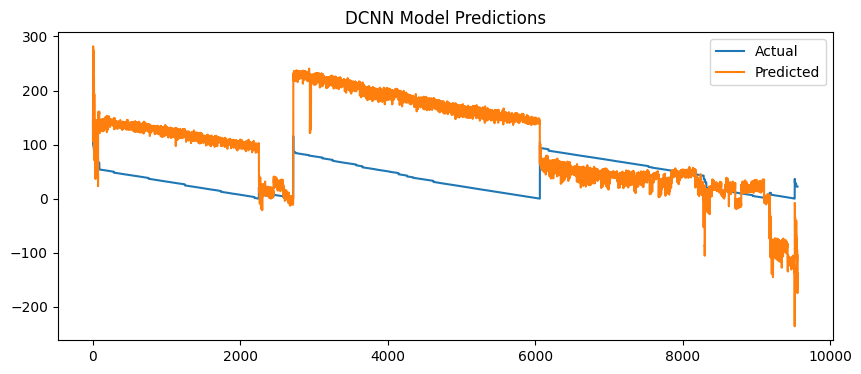

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Actual')
plt.plot(predictions_dcnn, label='Predicted')
plt.title('DCNN Model Predictions')
plt.legend()
plt.show()

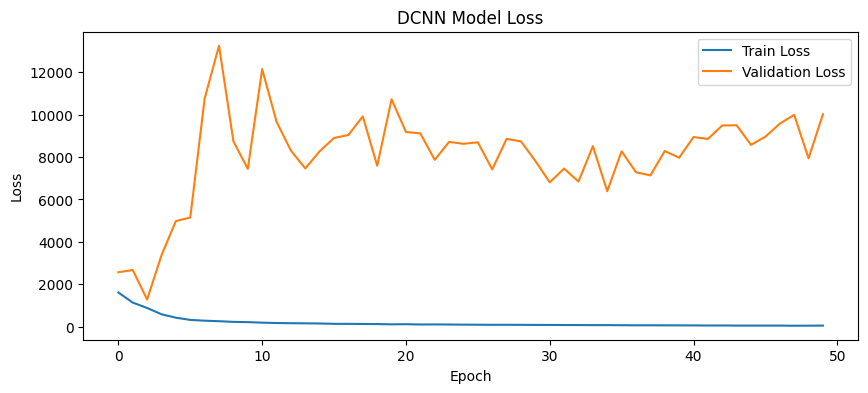

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(history_dcnn.history['loss'], label='Train Loss')
plt.plot(history_dcnn.history['val_loss'], label='Validation Loss')
plt.title('DCNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 4) RVE

- RepeatVector는 중간에 시퀀스를 반복하여 시간 차원에 걸쳐 동일한 컨텍스트를 제공
- 최종 TimeDistributed 레이어는 각 시퀀스 스텝에 대해 출력을 생성하여 원본 입력과 동일한 시퀀스 길이를 맞춤

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from sklearn.preprocessing import StandardScaler
from keras.metrics import MeanSquaredError, MeanAbsoluteError
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 설정 통일
n_units = 50
input_shape = (X_train_scaled.shape[1], 1)  # Conv1D, LSTM
input_shape_2d = (1, X_train_scaled.shape[1], 1)  # Conv2D
input_shape_3d = (1, 1, X_train_scaled.shape[1], 1)  # Conv3D
epochs = 50

In [ ]:
model_rve = Sequential([
    LSTM(n_units, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])),
    LSTM(n_units, return_sequences=False),
    RepeatVector(1),
    LSTM(n_units, return_sequences=True),
    LSTM(n_units, return_sequences=False),
    Dense(1)
])
model_rve.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
history_rve = model_rve.fit(X_train_scaled, y_train, epochs=epochs, verbose=1, validation_data=(X_test_scaled, y_test))

predictions_rve = model_rve.predict(X_test_scaled).flatten()

mse_rve = MeanSquaredError()(y_test, predictions_rve).numpy()
mae_rve = MeanAbsoluteError()(y_test, predictions_rve).numpy()
rmse_rve = np.sqrt(mse_rve)

Epoch 1/50
1204/1204 [==============================] - 20s 11ms/step - loss: 1004.9753 - mse: 1004.9753 - mae: 21.4320 - val_loss: 1226.3257 - val_mse: 1226.3257 - val_mae: 28.3533
Epoch 2/50
1204/1204 [==============================] - 12s 10ms/step - loss: 290.8624 - mse: 290.8624 - mae: 11.2306 - val_loss: 1024.9139 - val_mse: 1024.9139 - val_mae: 26.1255
Epoch 3/50
1204/1204 [==============================] - 12s 10ms/step - loss: 160.9609 - mse: 160.9609 - mae: 8.0981 - val_loss: 1381.2318 - val_mse: 1381.2318 - val_mae: 28.6285
Epoch 4/50
1204/1204 [==============================] - 12s 10ms/step - loss: 116.4135 - mse: 116.4135 - mae: 6.6179 - val_loss: 1459.3995 - val_mse: 1459.3995 - val_mae: 29.2451
Epoch 5/50
1204/1204 [==============================] - 12s 10ms/step - loss: 85.6109 - mse: 85.6109 - mae: 5.5794 - val_loss: 1730.4851 - val_mse: 1730.4851 - val_mae: 32.0265
Epoch 6/50
1204/1204 [==============================] - 12s 10ms/step - loss: 77.2603 - mse: 77.2603 - 

In [ ]:
print(f'RVE Test MSE: {mse_rve}, Test RMSE: {rmse_rve}, Test MAE: {mae_rve}')

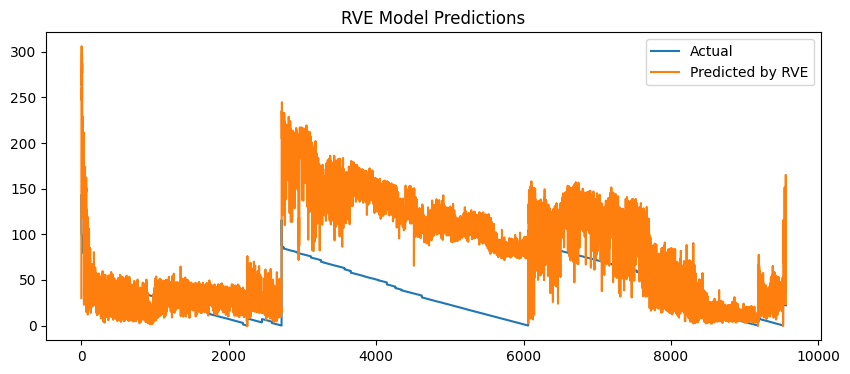

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Actual')
plt.plot(predictions_rve, label='Predicted by RVE')
plt.title('RVE Model Predictions')
plt.legend()
plt.show()

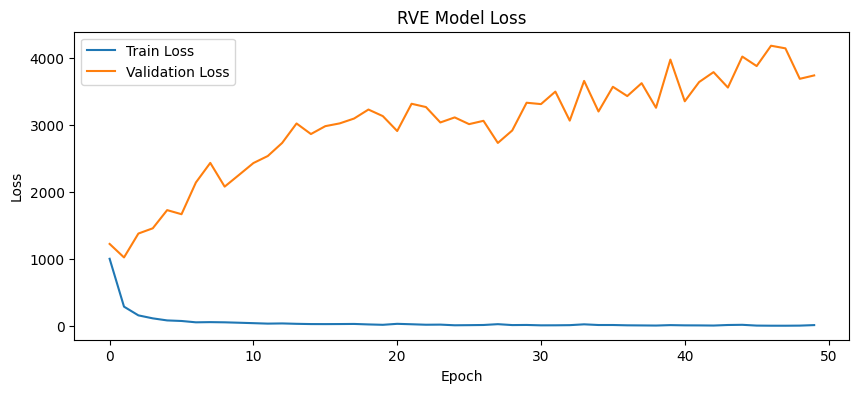

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(history_rve.history['loss'], label='Train Loss')
plt.plot(history_rve.history['val_loss'], label='Validation Loss')
plt.title('RVE Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
######## 참고로만 : CNN+LSTM 코드임 #################
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten

model_rve = Sequential()
model_rve.add(LSTM(100, input_shape=(X_train_scaled.shape[1], 1), return_sequences=True))  # LSTM 레이어
model_rve.add(Conv1D(filters=64, kernel_size=3, activation='relu'))  # 1D 합성곱
model_rve.add(MaxPooling1D(pool_size=2))  # 풀링 레이어
model_rve.add(Flatten())  # 데이터 펼치기
model_rve.add(Dense(50, activation='relu'))  # 완전 연결 레이어
model_rve.add(Dense(1))  # 출력 레이어
model_rve.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

# 모델 훈련
history_rve = model_rve.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test), verbose=1)

# 훈련 및 검증 손실 그래프
plt.figure(figsize=(10, 4))
plt.plot(history_rve.history['loss'], label='Train Loss')
plt.plot(history_rve.history['val_loss'], label='Validation Loss')
plt.title('RVE Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 예측
predictions_rve = model_rve.predict(X_test_scaled)

# 성능 지표 출력
mse, mae = model_rve.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test MSE: {mse}, Test MAE: {mae}')

# 5) LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 설정 통일
n_units = 50
input_shape = (X_train_scaled.shape[1], 1)  # Conv1D, LSTM
input_shape_2d = (1, X_train_scaled.shape[1], 1)  # Conv2D
input_shape_3d = (1, 1, X_train_scaled.shape[1], 1)  # Conv3D
epochs = 50

In [ ]:
model_lstm = Sequential([
    LSTM(n_units, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])),
    LSTM(20),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
history_lstm = model_lstm.fit(X_train_scaled, y_train, epochs=epochs, verbose=1, validation_data=(X_test_scaled, y_test))

predictions_lstm = model_lstm.predict(X_test_scaled).flatten()

In [ ]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             63000     
                                                                 
 lstm_1 (LSTM)               (None, 20)                5680      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 68701 (268.36 KB)
Trainable params: 68701 (268.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
mse_lstm, rmse_lstm, mae_lstm = calculate_metrics(y_test, predictions_lstm.flatten())

print(f'Test MSE: {mse_lstm}, Test MAE: {mae_lstm}, Test RMSE: {rmse_lstm}')

Test MSE: 2419.5393606458015, Test MAE: 39.020981912375184, Test RMSE: 49.188813368954136


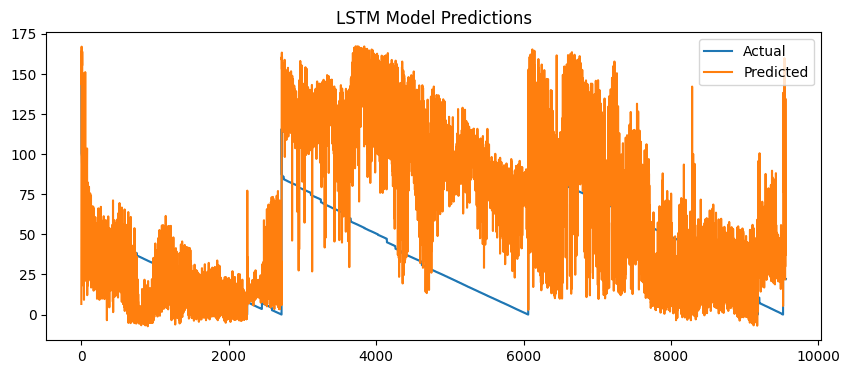

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Actual')
plt.plot(predictions_lstm, label='Predicted')
plt.title('LSTM Model Predictions')
plt.legend()
plt.show()

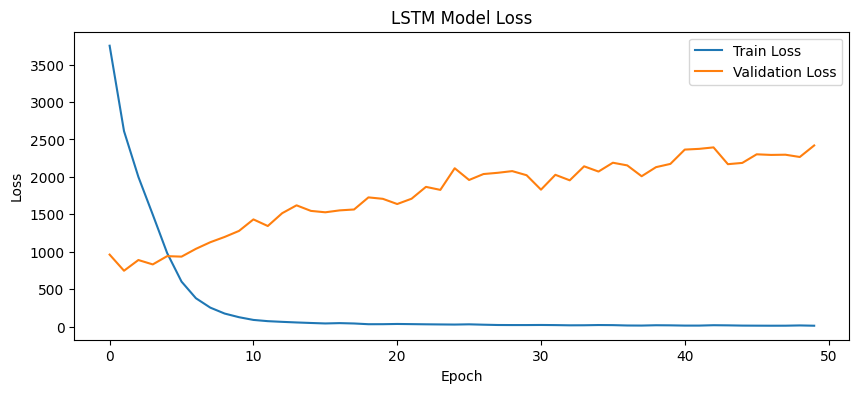

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 6) 비교해보기

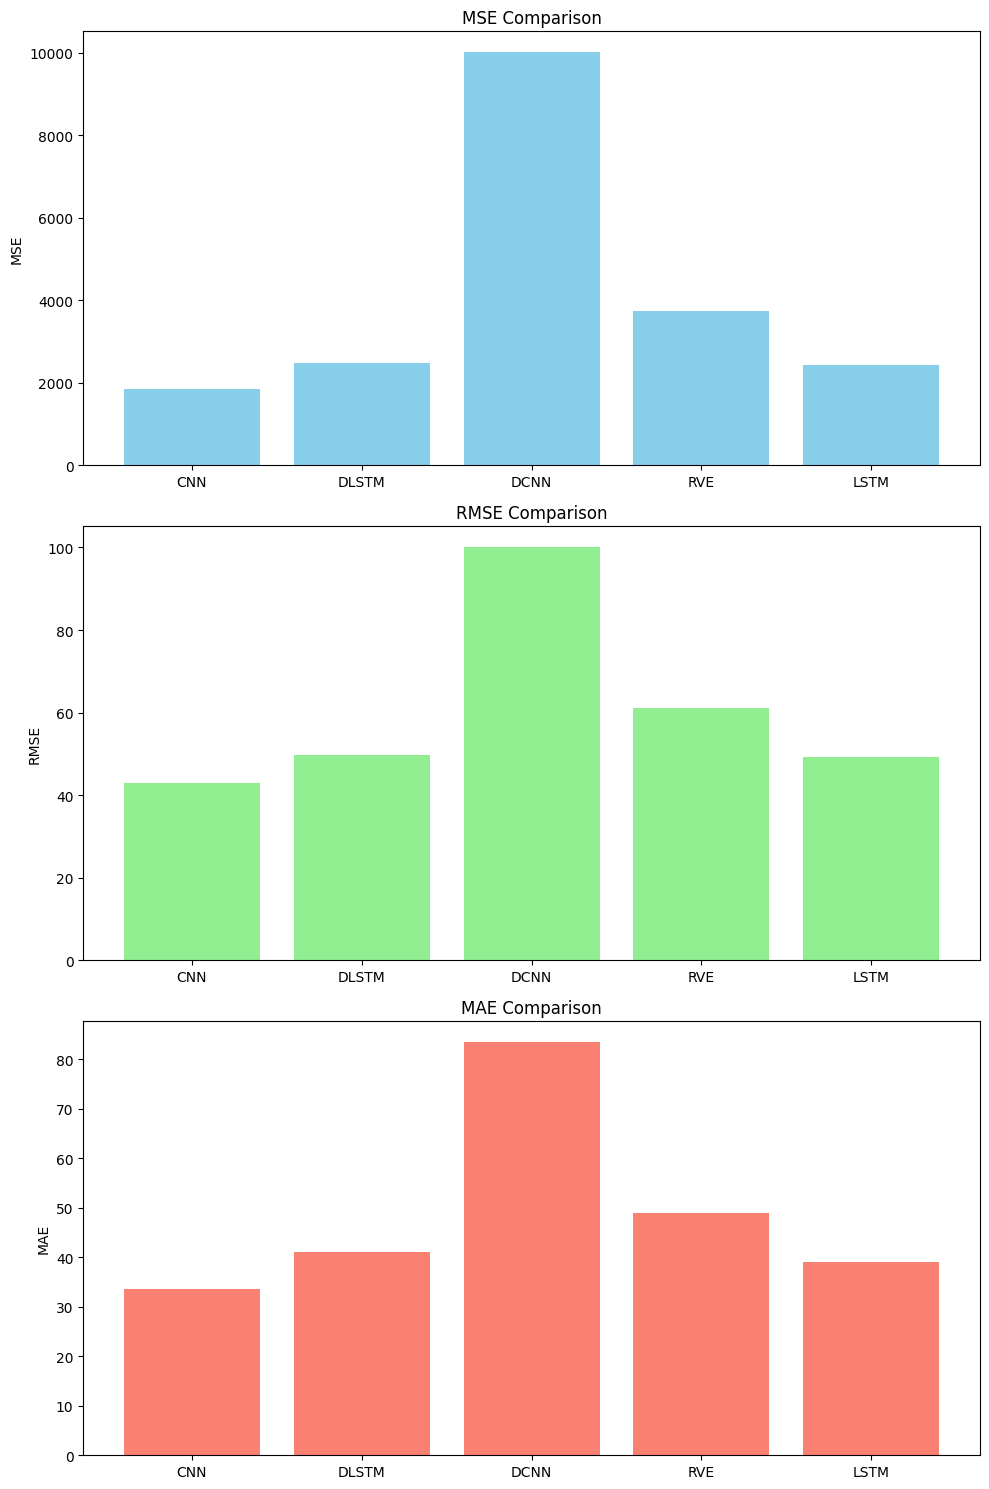

In [ ]:
import matplotlib.pyplot as plt

models = ['CNN', 'DLSTM', 'DCNN', 'RVE', 'LSTM']
mses = [1852.9795452942922, 2471.467027418451, 10021.128597095816, 3739.434814453125, 2419.5393606458015]
rmses = [43.04624891084347, 49.7138514643399, 100.10558724215056, 61.150917053222656, 49.188813368954136]
maes = [33.62438706347932, 41.0089576632875, 83.45837637400227, 48.87092971801758, 39.020981912375184]

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].bar(models, mses, color='skyblue')
ax[0].set_title('MSE Comparison')
ax[0].set_ylabel('MSE')

ax[1].bar(models, rmses, color='lightgreen')
ax[1].set_title('RMSE Comparison')
ax[1].set_ylabel('RMSE')

ax[2].bar(models, maes, color='salmon')
ax[2].set_title('MAE Comparison')
ax[2].set_ylabel('MAE')

plt.tight_layout()
plt.show()

# 7) 함수화로 통일해서 비교

299/299 [==============================] - 0s 1ms/step


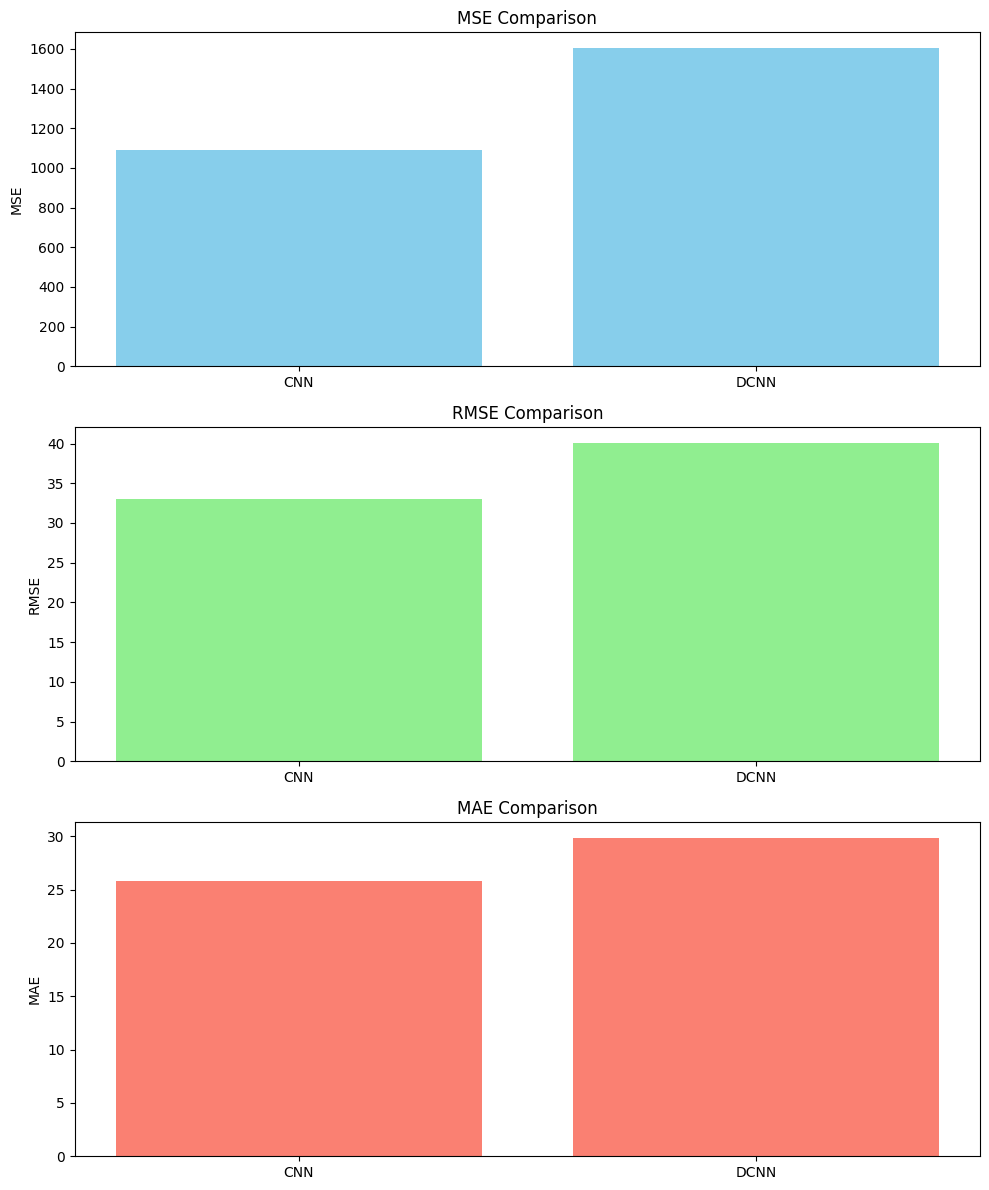

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout, TimeDistributed, RepeatVector
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.metrics import MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 데이터 차원 변경
X_train_scaled1D = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled1D = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# 함수 1 : 각 모델 만들기
def build_model(model_type):
    model = Sequential()
    if model_type == 'CNN' or model_type == 'DCNN':
        # CNN 모델, DCNN 모델
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled1D.shape[1], 1)))
        model.add(MaxPooling1D(pool_size=2))
        if model_type == 'DCNN':
            model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
            model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
    return model

# 모델 학습 및 예측
models = ['CNN', 'DCNN']
predictions = {}
for model_type in models:
    model = build_model(model_type)
    history = model.fit(X_train_scaled1D, y_train, epochs=50, verbose=0, validation_data=(X_test_scaled1D, y_test))
    predictions[model_type] = model.predict(X_test_scaled1D).flatten()

# 성능 지표 계산 및 비교
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

metrics = {model: calculate_metrics(y_test, predictions[model]) for model in models}
mses, rmses, maes = zip(*[metrics[model] for model in models])

# 성능 비교 그래프 그리기
fig, ax = plt.subplots(3, 1, figsize=(10, 12))
ax[0].bar(models, mses, color='skyblue')
ax[0].set_title('MSE Comparison')
ax[0].set_ylabel('MSE')
ax[1].bar(models, rmses, color='lightgreen')
ax[1].set_title('RMSE Comparison')
ax[1].set_ylabel('RMSE')
ax[2].bar(models, maes, color='salmon')
ax[2].set_title('MAE Comparison')
ax[2].set_ylabel('MAE')
plt.tight_layout()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout, TimeDistributed, RepeatVector
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.metrics import MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 데이터 차원 변경 (데이터를 (샘플 수, 1, 특성 수)의 형태로 재배열)
X_train_scaled_correct = X_train_scaled.reshape(-1, 1, X_train_scaled.shape[1])
X_test_scaled_correct = X_test_scaled.reshape(-1, 1, X_test_scaled.shape[1])


# 함수 1 : 각 모델 만들기
def build_model(model_type):
    model = Sequential()
    if model_type == 'LSTM' or model_type == 'DLSTM' or model_type == 'RVE':
        # LSTM, DLSTM, RVE 모델
        model.add(LSTM(50, return_sequences=True if model_type in ['DLSTM', 'RVE'] else False, input_shape=(1, X_train_scaled.shape[1])))
        if model_type == 'DLSTM':
            model.add(Dropout(0.2))
            model.add(LSTM(50, return_sequences=True))
            model.add(Dropout(0.2))
        if model_type == 'RVE':
            model.add(RepeatVector(1))
            model.add(LSTM(50, return_sequences=True))
        model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
    return model

# 모델 학습 및 예측
models = ['DLSTM', 'RVE', 'LSTM']
predictions = {}
for model_type in models:
    model = build_model(model_type)
    history = model.fit(X_train_scaled1D, y_train, epochs=50, verbose=0, validation_data=(X_test_scaled1D, y_test))
    history = model_dlstm.fit(X_train_scaled_correct, y_train, epochs=50, verbose=1, validation_data=(X_test_scaled_correct, y_test))
    predictions[model_type] = model.predict(X_test_scaled1D).flatten()
    predictions_dlstm = model_dlstm.predict(X_test_scaled_correct)

# 성능 지표 계산 및 비교
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

metrics = {model: calculate_metrics(y_test, predictions[model]) for model in models}
mses, rmses, maes = zip(*[metrics[model] for model in models])

# 성능 비교 그래프 그리기
fig, ax = plt.subplots(3, 1, figsize=(10, 12))
ax[0].bar(models, mses, color='skyblue')
ax[0].set_title('MSE Comparison')
ax[0].set_ylabel('MSE')
ax[1].bar(models, rmses, color='lightgreen')
ax[1].set_title('RMSE Comparison')
ax[1].set_ylabel('RMSE')
ax[2].bar(models, maes, color='salmon')
ax[2].set_title('MAE Comparison')
ax[2].set_ylabel('MAE')
plt.tight_layout()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout, TimeDistributed, RepeatVector
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.metrics import MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 데이터 차원 변경
X_train_scaled1D = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled1D = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# 데이터 차원 변경 (데이터를 (샘플 수, 1, 특성 수)의 형태로 재배열)
X_train_scaled_correct = X_train_scaled.reshape(-1, 1, X_train_scaled.shape[1])
X_test_scaled_correct = X_test_scaled.reshape(-1, 1, X_test_scaled.shape[1])


# 함수 1 : 각 모델 만들기
def build_model(model_type):
    model = Sequential()
    if model_type == 'CNN' or model_type == 'DCNN':
        # CNN 모델, DCNN 모델
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled1D.shape[1], 1)))
        model.add(MaxPooling1D(pool_size=2))
        if model_type == 'DCNN':
            model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
            model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
    elif model_type == 'LSTM' or model_type == 'DLSTM' or model_type == 'RVE':
        # LSTM, DLSTM, RVE 모델
        model.add(LSTM(50, return_sequences=True if model_type in ['DLSTM', 'RVE'] else False, input_shape=(1, X_train_scaled.shape[1])))
        if model_type == 'DLSTM':
            model.add(Dropout(0.2))
            model.add(LSTM(50, return_sequences=True))
            model.add(Dropout(0.2))
        if model_type == 'RVE':
            model.add(RepeatVector(1))
            model.add(LSTM(50, return_sequences=True))
        model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
    return model

# 모델 학습 및 예측
models = ['CNN', 'DLSTM', 'DCNN', 'RVE', 'LSTM']
predictions = {}
for model_type in models:
    model = build_model(model_type)
    history = model.fit(X_train_scaled1D, y_train, epochs=50, verbose=0, validation_data=(X_test_scaled1D, y_test))
    history = model_dlstm.fit(X_train_scaled_correct, y_train, epochs=50, verbose=1, validation_data=(X_test_scaled_correct, y_test))
    predictions[model_type] = model.predict(X_test_scaled1D).flatten()
    predictions_dlstm = model_dlstm.predict(X_test_scaled_correct)

# 성능 지표 계산 및 비교
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

metrics = {model: calculate_metrics(y_test, predictions[model]) for model in models}
mses, rmses, maes = zip(*[metrics[model] for model in models])
print(f"DLSTM Test MSE: {mse_dlstm}, Test RMSE: {rmse_dlstm}, Test MAE: {mae_dlstm}")

# 성능 비교 그래프 그리기
fig, ax = plt.subplots(3, 1, figsize=(10, 12))
ax[0].bar(models, mses, color='skyblue')
ax[0].set_title('MSE Comparison')
ax[0].set_ylabel('MSE')
ax[1].bar(models, rmses, color='lightgreen')
ax[1].set_title('RMSE Comparison')
ax[1].set_ylabel('RMSE')
ax[2].bar(models, maes, color='salmon')
ax[2].set_title('MAE Comparison')
ax[2].set_ylabel('MAE')
plt.tight_layout()
plt.show()